<a href="https://colab.research.google.com/github/arijdavis/CAP4630/blob/master/Hw4/Hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("TensorFlow Version: " , tf.__version__, "\n")

for x in device_lib.list_local_devices():
   if x.device_type == "GPU":
     print("***** GPU Information *****")
     print("Device Name: " , x.name)
     print("Memory Limit: " , "%.2f" % float(x.memory_limit/(1000*1000*1000)), "GB")
     print("Description: " , x.physical_device_desc)

TensorFlow Version:  1.15.0 

***** GPU Information *****
Device Name:  /device:GPU:0
Memory Limit:  7.47 GB
Description:  device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1


# 0. General concepts (for instance, what is artificial intelligence, machine learning, deep learning)



**Introduction to AI**

The definition of artificial intelligence (AI) is always changing. It is mainly the science of simulating intelligent behavior using machines in a way that allows the machine to perform tasks that mimic, supplement,or surpase human intelligence. 

AI can be broken up into many subcategories deferentiated by the machines are constructed to make decisions. Symbolic 'old-fashioned' represents machines contructed via human-readable methods, and functions by being fed the inputs and rules to produce some output. Machine learning on the other hand is a process that takes in the inputs and outputs to derive the rules it will operate under, however,the way the machine arrived at those rules is not often well understood by humans. 

Machine learning is the process of creating a mathmatical model that can make predicitons about new data after it has trained to learn patterns in curated datasets. Machine learning models can take many forms depending on the type of problem being solved. Supervised learning, for example, is the process of discovering patterns in labeled data. Unsupervised learning on the other hand is the process of discovering patterns in unlabeled data. A third type called reinforcement learning gives the model, or agent, a specific goal it has to learn how to reach or maintain through its actions upon the environment.

Deep learning is a subset of machine learning that utilizes models called artificial neural networks designed vaguely like neurons in the human brain. Neural networks utilize layers, data-processing sectors of the model that take in and output multidimentional arrays (also known as  vectors or tensors). Layers can have weights or come in different forms depending on the kind of data being processed. 

# 1. Building a model (for instance, here you can talk about the structure of a convent, what it components are etc.)


**Building a Linear Regression Model**

Linear regression is a machine learning model that uses the equation:

>  y' = b + w1*x1

where y represents the model's prediciton, b represents the models bias, x1 represents a 'feature' or a known input within the dataset, and w1 represents the 'weight' or level of significance that the feature will be given in influencing the predictions. These models can have more than one weight and feature. 

Linear regression models best work with data where the features' inputs have a linear relationship with the outputs as demonstrated below: 

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
import numpy as np

# generate data
m = 100
xs = 2 * np.random.rand(m, 1)
ys = 4 + 3 * xs + np.random.rand(m, 1)

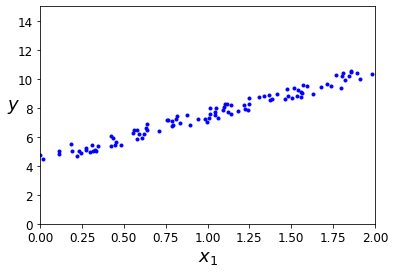

In [7]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Once we've gathered our data, we can begin to group it into two sets: one for training, and one for testing. The training set filled with the data the model will use to learn patterns, whereas the test set is used so that we can test to make sure the model accuratly understood the patterns by giving it data it has never worked with.

In [0]:
# split the data into training and test sets
# train set
train_xs = xs[:80]
train_ys = ys[:80]
# test set
test_xs = xs[80:]
test_ys = ys[80:]

**Building a Neural Network**

A neural network can be considered a directed graph of connected layers. Commonly these layers take the form of linear stacks that map one input to one output, but there are many more complext ways that layers can be arranged. When building a neural network, you have to consider the type of data you want to process in order to select the right type of layers to construct. Convolutional layers, for example, process image data stored in 4D tensors. They go hand in hand with Convolutional Neural Networks (CNNs) that take in raw image pixel data and learn to understand what the image is displaying. Convolutional Neural Networks similarly need to have their data properly set up and images resized.

In [9]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

Using TensorFlow backend.


The code below shows the process of building convolutional layers that will process the images of handwritten numbers in the MNIST dataset.

In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_3 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1384512   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 1,385,482
Trainable params: 1,385,482
Non-trainable params: 0
_________________________________________________________________


As shown above, Keras is being used to combine multiple different types of compatable layers (Conv2D, MaxPooling, Flatten, and Dense) to form a pipeline that will process the image data. Layer compatability is very important to keep in mind, since each layer requires inputs and returns outputs that are a specific shape. Keras is capable of automatically infering the input shape a layer needs if it was specified in the layer before it. 

# 2. Compiling a model (for instance, you can talk here about optimizers, learning rate etc.)

**Compiling a Linear Regression Model**

Compiling a linear regression model involves setting up the hyperparameters, or adjustable values that affect how the model operates as it runs. The key values to adjust are the epoch and the learning rate. The number of epochs indicate the number of times training set passes through the model. The learning rate, however, is related to how the model learns. It is a scalar value that is used to calculate how much the weights should be adjusted for the next pass through of the training data.

In [0]:
# number of epochs
epochs = 10
# learning rate
lr = 0.01

**Compiling a Convolutional Neural Network**

Compiling a neural network involves selecting the type of optimizer and loss function that the model will use to process the data.

The loss function calculates a value known as the loss to measure how successfull the model is doing in the training stage. The model is aiming to lower the loss value as much as possible, and it can use a number of different functions to accomplish that based on the problem at hand. This model is using a categorical_crossentrophy loss function, which works well for multiclass, single label classificaiton problems like identifying a handwritten letter.

In [0]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

The optimizer will decide how to update the network depending on the loss fucntion. It has a similar function as the learning rate in the linear regression model. This specific optimizer known as the RMSprop is able to adapt its learning rate over time rather than using a single rate.

# 3. Training a model (for instance, you can talk about overfitting/underfitting)

**Training a Linear Regression Model**

A machine learning model trains by adjusting the values of its weights and biases until it discovers the values that results in the smallest loss, or in otherwords the highest accuracy. Rather than calculating every possible combination of values,the model utilizes a mechanic known as gradient descent to find the smallest loss value.

In [13]:
# initial value for weight w and bias b
w = np.random.randn(1)
b = np.zeros(1)

for epoch in np.arange(epochs):
  for i in np.arange(80):
    y_pred = w * train_xs[i] + b
    
    grad_w = (y_pred - train_ys[i]) * train_xs[i]
    grad_b = (y_pred - train_ys[i])
    
    w -= lr * grad_w
    b -= lr * grad_b

test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w * test_xs[i] + b - test_ys[i]) ** 2
test_loss /= 20

test_loss

array([0.08841288])

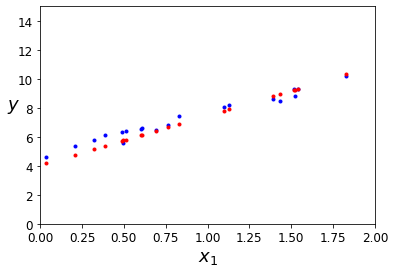

In [14]:
pred_ys = w * test_xs + b
plt.plot(test_xs, test_ys, "b.")
plt.plot(test_xs, pred_ys, "r.") # predicted values
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

**Training a Convolutional Neural Network**

Training a neural network can be very simple. Without the right layer architecture, however, the predictions will not be as good as they could be.

In [27]:
epochs = 10
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs, 
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1733 - acc: 0.9465 - val_loss: 0.0660 - val_acc: 0.9787
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0574 - acc: 0.9833 - val_loss: 0.0557 - val_acc: 0.9818
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0366 - acc: 0.9894 - val_loss: 0.0481 - val_acc: 0.9849
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0249 - acc: 0.9928 - val_loss: 0.0540 - val_acc: 0.9839
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0171 - acc: 0.9949 - val_loss: 0.0542 - val_acc: 0.9850
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0119 - acc: 0.9967 - val_loss: 0.0653 - val_acc: 0.9846
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0082 - acc: 0.9977 - val_loss: 0.0726 - val_acc

The graphs below show that our model is overfitting. This occurs when the model is successful with the training data, but fails with the testing data. The model is likely unable to make generalizations about the data that would help improve its performance with unseen data. 

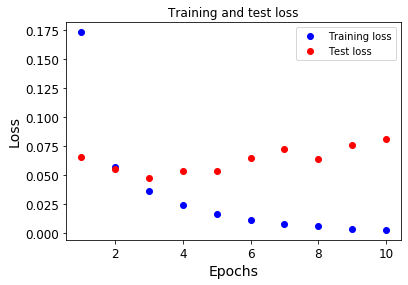

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

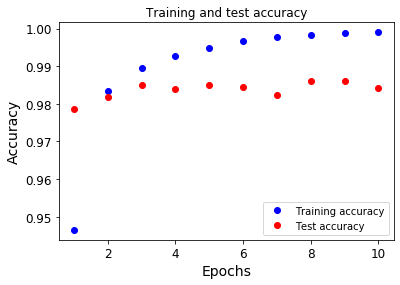

In [29]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Another way the model could have perfromed poorly was by underfitting,or failing to have a high accuracy on the training dataset rather than the test dataset. This would indicate that the model was unable to relate the inputs to the output in a meaningful way. 

# 4.  Finetuning  a pretrained model (describe how you proceed)

**Finetuning a Convolutional Neural Network**

In order to prevent our model from overfitting, we can fine tune it using a number of strategies. The general way to combat overfitting is by making the model more specific and less flexible by experimenting with the number, size, and type of layers in the network's architeture

In [35]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

This time around we have a lot more layers in our network architechure. We specifically added a layer type known as max pooling. It aims to reduce the number of parameters and computations in the network, thus being one method of reducing flexibility. There are many more ways to help a model fight overfitting, such as adding what is known as a dropout layer that will randomply ignore nodes in the network during a particular pass. That way they nodes are unable to be as dependent on one another when learning.

In [31]:
model2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

epochs = 10
history = model2.fit(train_images, 
                    train_labels, 
                    epochs=epochs, 
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1682 - acc: 0.9476 - val_loss: 0.0838 - val_acc: 0.9734
Epoch 2/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0478 - acc: 0.9857 - val_loss: 0.0826 - val_acc: 0.9727
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0323 - acc: 0.9902 - val_loss: 0.0370 - val_acc: 0.9894
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0248 - acc: 0.9928 - val_loss: 0.0330 - val_acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0196 - acc: 0.9944 - val_loss: 0.0267 - val_acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0162 - acc: 0.9951 - val_loss: 0.0293 - val_acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0133 - acc: 0.9958 - val_loss: 0.0333 - val_acc

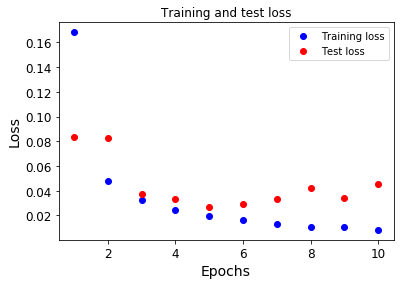

In [32]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

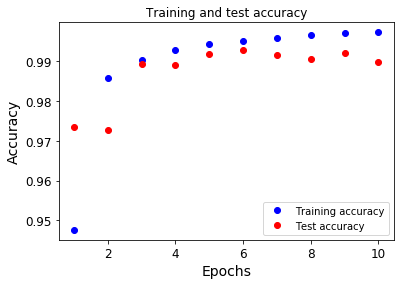

In [33]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()